# AI06 - TD03 : Incertitude de mesure

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercice 1 

Calcul de la variance : 

$$Var(g(X_1, \dots, X_2)) = \left(\frac{\partial g}{\partial_{X_1}}(x_1^0, \dots, x_n^0) \right)^2Var(X_1) + \dots + \left(\frac{\partial g}{\partial_{X_n}}(x_1^0, \dots, x_n^0) \right)^2Var(X_n)$$

Dans cet exercice : $a = \frac{\sqrt{F_x^2 + F_y^2}}{m}$

Développement: 

$\frac{\partial a}{\partial F_x} = \frac{\partial a}{\partial u}\frac{\partial u}{\partial F_x} = \frac{2F_x}{m*2\sqrt{F_x^2+F_y^2}} = \frac{F_x}{m\sqrt{F_x^2+F_y^2}}$

$\frac{\partial a}{\partial F_y} = \frac{\partial a}{\partial u}\frac{\partial u}{\partial F_y} = \frac{2F_y}{m*2\sqrt{F_x^2+F_y^2}} = \frac{F_y}{m\sqrt{F_x^2+F_y^2}}$

$\frac{\partial a}{\partial m} = -\frac{\sqrt{F_x^2+F_y^2}}{m^2}$

On a donc : 

$$\begin{align*}Var(a) &= \left( \frac{\partial a}{\partial F_x} \right)^2Var(x) + \left( \frac{\partial a}{\partial F_y} \right)^2Var(y) + \left( \frac{\partial a}{\partial m} \right)^2Var(m) \\	   &= \left( \frac{F_x}{m\sqrt{F_x^2+F_y^2}} \right)^2\sigma(x)^2 + \left( \frac{F_y}{m\sqrt{F_x^2+F_y^2}} \right)^2\sigma (y)^2 + \left( -\frac{\sqrt{F_x^2+F_y^2}}{m^2} \right)^2\sigma(m)^2\end{align*}$$



Application numérique :

$\sigma_x = 0.05N \Rightarrow \sigma_x^2 = 0.0025$

$\sigma_y = 0.05N \Rightarrow \sigma_y^2 = 0.0025$

$\frac{\sigma_m}{m} = 0.5\% \Rightarrow \sigma_m = 0.5/100*0.185 = 9.25*10^{-4} \Rightarrow \sigma_m^2 = 8.55625*10^{-7} $








In [65]:
Fx = 0.8
Fy = 1.4
m = 0.185

In [66]:
var_x = 0.05**2
var_y = 0.05**2
var_m = (0.5/100*m)**2

In [67]:
var_a = (Fx/(m*np.sqrt(Fx**2 + Fy**2)))**2*var_x + (Fy/(m*np.sqrt(Fx**2 + Fy**2)))**2*var_y + (-np.sqrt(Fx**2 + Fy**2)/(m**2))**2*var_m
print('Variance de a : {:.4f}'.format(var_a))

Variance de a : 0.0749


In [68]:
sigma_a = np.sqrt(var_a)
print('Ecart-type de a : {:.4f}'.format(sigma_a))

Ecart-type de a : 0.2738


In [69]:
a = np.sqrt(Fx**2 + Fy**2)/m
print('a = {:.4f} +/- {:.4f} m.s^(-2)'.format(a, sigma_a))
print('Invertitude relative : {:2.4%}'.format(sigma_a/a))

a = 8.7160 +/- 0.2738 m.s^(-2)
Invertitude relative : 3.1409%


## Exercice 2

### Question 1
Tracer les points (x,y) observés

In [70]:
df = pd.DataFrame({
    'x' : [2.02, 2.66, 3.72, 5.73, 8.97, 9.08],
    'y' : [9.29, 10.4, 10.89, 16.27, 22.88, 23.16]
})

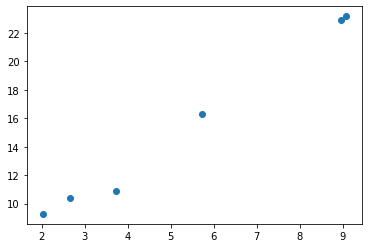

In [77]:
plt.scatter(df.x, df.y)
plt.show()

### Question 2
On suppose une relation linéaire y = ax + b, calculer les coecients a et b par la méthode des moindres carrés et tracer la droite des moindres carrés.


Erreur quadratique : 
$$
E(a,b) = \sum_{i=1}^n(y_i - (ax_i + b))^2
$$
Paramètres optimums pour minimiser l'erreur E
$$
\hat{a} = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2} \\
\hat{b} = \bar{y} - \hat{a}\bar{x}
$$

In [110]:
x_bar = np.mean(df.x)
y_bar = np.mean(df.y)

In [111]:
a_hat = np.sum((df.x - x_bar)*(df.y - y_bar)) / (np.sum((df.x - x_bar)**2))
print('a_hat : {:.5f}'.format(a_hat))

a_hat : 2.02511


In [112]:
b_hat = y_bar - a_hat * x_bar
print('b_hat : {:.5f}'.format(b_hat))

b_hat : 4.62031


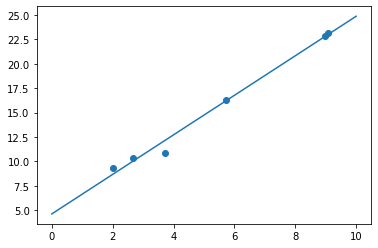

In [113]:
plt.scatter(df.x, df.y)
plt.plot(np.linspace(0, 10, 10), a_hat * np.linspace(0, 10, 10) + b_hat)

### Question 3
Donner une estimation de la variance du bruit de mesure.

In [125]:
residus = df.y - (a_hat * df.x + b_hat)
residus

0    0.578961
1    0.392889
2   -1.263731
3    0.045792
4    0.094426
5    0.151664
dtype: float64

In [130]:
var_noise = (1/(len(df)-2)) * np.sum(residus**2)
var_noise

0.530147117344608

### Question 4 & 5

Estimer les coeffcients a et b par la méthode des moindres carrés pondérés. (On se limitera à deux itérations)

 On apprend que la relation théorique entre x et y est : y = 2x + 5. Comparer les erreurs d'estimation des coecients a et b, aux diérentes itérations de la méthode des moindres carrés pondérés.


In [289]:
# True parameters
a = 2
b = 5

a_hat = 2.02511, b_hat = 4.62031, error = 0.0589052353
a_hat = 2.01574, b_hat = 4.77337, error = 0.0020508154
a_hat = 2.00986, b_hat = 4.84434, error = 0.0010253511


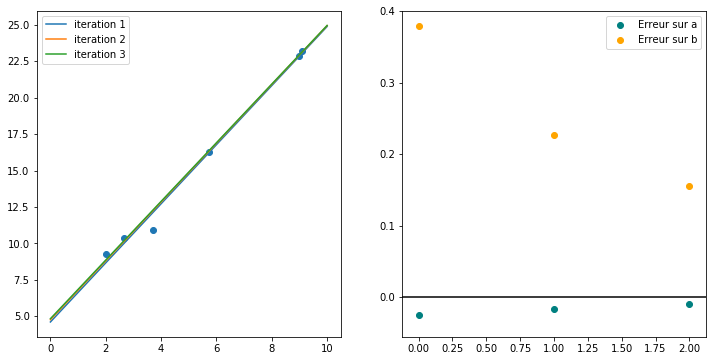

In [294]:
# Initialisation
df['weight'] = 1 / len(df)
df

err_a = []
err_b = []

plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

# Main loop
for i in range(3):
    a_hat = (np.sum(df.weight * df.x * df.y) - np.sum(df.weight * df.x)*np.sum(df.weight * df.y)) / (np.sum(df.weight * df.x**2) - np.sum(df.weight * df.x)**2)
    b_hat = np.sum(df.weight * df.y) - a_hat * np.sum(df.weight * df.x)
    err = np.sum((df.weight * (df.y - (a_hat * df.x + b_hat)))**2)
    print('a_hat = {:.5f}, b_hat = {:.5f}, error = {:.10f}'.format(a_hat, b_hat, err))
    df['weight'] = 1 / np.abs(df.y - (a_hat * df.x + b_hat))
    df['weight'] = df['weight'] / df['weight'].sum()
    
    ax1.plot(np.linspace(0,10,10), a_hat*np.linspace(0,10,10) + b_hat, label='iteration {}'.format(i+1))
    err_a.append(a - a_hat)
    err_b.append(b - b_hat)
    
ax2.scatter(np.arange(len(err_a)), err_a, color='teal', label='Erreur sur a')
ax2.scatter(np.arange(len(err_b)), err_b, color='orange', label='Erreur sur b')

ax1.scatter(df.x, df.y)
ax2.axhline(0, color='k')
ax1.legend()
ax2.legend()
plt.show()

In [295]:
df

,x,y,weight
0,2.02,9.29,0.014983
1,2.66,10.40,0.027597
2,3.72,10.89,0.004039
3,5.73,16.27,0.063618
4,8.97,22.88,0.802353
5,9.08,23.16,0.087411
